**Aim:Training of neuron with gradient descent**

4A. Generate 61 points for target = sin x , where x ∈ [−3, 3]. Use this dataset to train two layer neural networks using gradient descent learning algorithm. Draw two curves with different colours, for target and output(y) of the trained neural network.

In [ ]:
import numpy as np
# Generate 61 points for x in the range [-3, 3]
x= np.linspace(-3,3,61)

y= np.sin(x)

In [ ]:
# Define the size of each layer
input_size = 1 # Single input
hidden_size = 10 # Number of neurons in the hidden layer
output_size = 1 # Single output
#multilevel sigmoid neuron model

In [ ]:
# Initialize weights and biases
np.random.seed(42) # For reproducibility

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

In [ ]:
#Rectified Linear Unit (ReLU) activation function which on input z, it returns the maximum of 0 and z.
def relu(z):
  return np.maximum(0, z)


In [ ]:
learning_rate = 0.01
epochs = 1000 # Number of times to loop through the entire dataset

In [ ]:
for epoch in range(epochs):
  # Forward pass
  Z1 = np.dot(x.reshape(-1, 1), W1) + b1
  A1 = relu(Z1)     #Apply the ReLU to Z1 to get the activation values A1
  Z2 = np.dot(A1, W2) + b2
  y_pred = Z2.flatten()
  # Calculate the loss (Mean Squared Error)
  loss = np.mean((y_pred - y) ** 2)


In [ ]:
     - Compute the **weighted sum** of the input features `x` using the weight matrix `W1` and add the bias `b1`. This gives us `Z1`.
     - Compute the **weighted sum** of `A1` using the weight matrix `W2` and add the bias `b2`. This gives us `Z2`.
     - Flatten `Z2` to obtain the predicted output `y_pred`.

2. **Loss Calculation**:
   - The loss function used here is the **Mean Squared Error (MSE)**.
   - It measures the average squared difference between the predicted output (`y_pred`) and the actual target values (`y`).
   - The formula for MSE is:
     \[ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{pred},i} - y_i)^2 \]
     where:
     - \(n\) is the number of data points.
     - \(y_{\text{pred},i}\) is the predicted value for the \(i\)th data point.
     - \(y_i\) is the actual target value for the \(i\)th data point.

   The goal during training is to minimize this loss by adjusting the weights and biases.

Feel free to ask if you have any further questions or need additional explanations! 😊

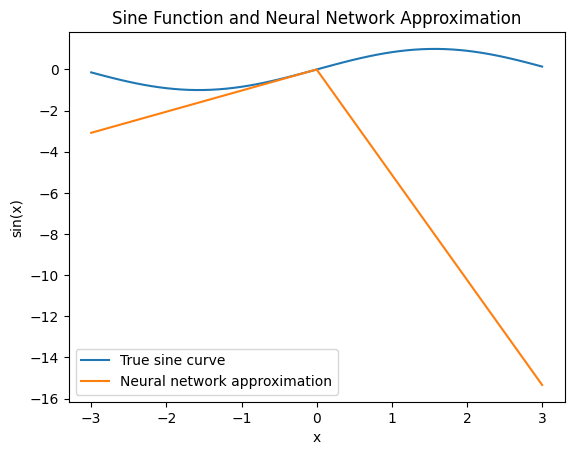

In [ ]:
import matplotlib.pyplot as plt
# Plotting the original sine curve and the neural network's approximation
plt.plot(x, y, label='True sine curve')
plt.plot(x, y_pred, label='Neural network approximation')
plt.legend()
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Sine Function and Neural Network Approximation')
plt.show()

version 2

In [ ]:
def relu(z):
  return np.maximum(0, z)

#computes the derivative of the ReLU function
def relu_deriv(z):
  return (z > 0).astype(float)

In [ ]:
learning_rate = 0.01
epochs = 10000
losses = []

In [ ]:
for epoch in range(epochs):
  # Forward pass
  Z1 = np.dot(x.reshape(-1, 1), W1) + b1
  A1 = relu(Z1)
  Z2 = np.dot(A1, W2) + b2
  y_pred = Z2
  # Compute loss (Mean Squared Error)
  loss = np.mean((y_pred.flatten() - y) ** 2)
  losses.append(loss)
  # Backpropagation
  d_loss_y_pred = 2 * (y_pred.flatten() - y) / y.size
  d_loss_y_pred = d_loss_y_pred.reshape(-1, 1)
  # Compute gradients
  d_loss_Z2 = d_loss_y_pred
  d_loss_A1 = np.dot(d_loss_Z2, W2.T)
  d_loss_W2 = np.dot(A1.T, d_loss_Z2)
  d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)
  d_loss_Z1 = d_loss_A1 * relu_deriv(Z1)
  d_loss_W1 = np.dot(x.reshape(-1, 1).T, d_loss_Z1)
  d_loss_b1 = np.sum(d_loss_Z1, axis=0, keepdims=True)
  # Update weights and biases
  W1 -= learning_rate * d_loss_W1
  b1 -= learning_rate * d_loss_b1
  W2 -= learning_rate * d_loss_W2
  b2 -= learning_rate * d_loss_b2

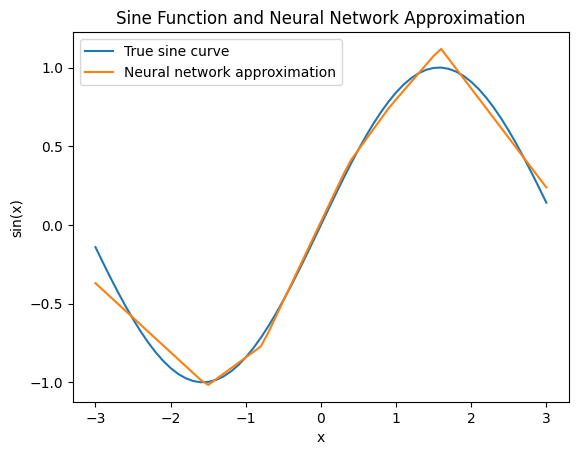

In [ ]:
import matplotlib.pyplot as plt
# Plotting the original sine curve and the neural network's approximation
plt.plot(x, y, label='True sine curve')
plt.plot(x, y_pred, label='Neural network approximation')
plt.legend()
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Sine Function and Neural Network Approximation')
plt.show()

4B.Use MNIST dataset to train neural networks using gradient descent learning
algorithm.Experiments with various Architectures of neural networks, and with different activation functions for hidden and output layers.

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Step 1: Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Step 2: Preprocess the data
# Normalize the input data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Step 3: Define the model architecture
def create_model(hidden_layers=1, neurons=64, activation='relu', input_shape=(28, 28)):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=input_shape)) # Flatten the input
  for _ in range(hidden_layers):
    model.add(layers.Dense(neurons, activation=activation)) # Add hidden layers
    model.add(layers.Dense(10, activation='softmax')) # Output layer with softmax activation
    return model

In [ ]:
# Example: Create a model with 2 hidden layers, 64 neurons each, using ReLU activation
model = create_model(hidden_layers=2, neurons=64, activation='relu', input_shape=(28, 28))

In [ ]:
# Step 4: Compile the model
model.compile(optimizer='sgd', # Stochastic Gradient Descent
loss='sparse_categorical_crossentropy', # Loss function for integers
metrics=['accuracy'])

In [ ]:
# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.7461 - accuracy: 0.8099 - val_loss: 0.3330 - val_accuracy: 0.9138
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3623 - accuracy: 0.8994 - val_loss: 0.2678 - val_accuracy: 0.9262
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3117 - accuracy: 0.9112 - val_loss: 0.2374 - val_accuracy: 0.9327
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2823 - accuracy: 0.9195 - val_loss: 0.2203 - val_accuracy: 0.9370
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2600 - accuracy: 0.9269 - val_loss: 0.2036 - val_accuracy: 0.9442
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2419 - accuracy: 0.9311 - val_loss: 0.1917 - val_accuracy: 0.9463
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2262 - accuracy: 0.9360 - val_loss: 0.1791 - val_accuracy:

In [ ]:
# Step 6: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1845 - accuracy: 0.9457
Test Accuracy: 0.9457


Conclusion: Learnt the concept of gradient descent and to apply it on different dataset